In [141]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np

In [142]:
df_geo_json = gpd.read_file('london.json')
df=pd.read_csv('training_WeeklyAggregate.csv')

In [143]:
df_geo_json

,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME,geometry
0,E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.746600,0,"Hillingdon, 00AS (0)","MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51..."
1,E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.565170,1,"Newham, 00BB (1)","MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5..."
2,E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.082410,2,"Newham, 00BB (2)","MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5..."
3,E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.331750,3,"Newham, 00BB (3)","MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5..."
4,E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.419020,4,"Newham, 00BB (4)","MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000974,Westminster 015,00BK,Westminster,527028,181254,527172,181179,0.689337,978,"Westminster, 00BK (978)","MULTIPOLYGON (((-0.17019 51.51994, -0.16019 51..."
979,E02000975,Westminster 016,00BK,Westminster,526396,181129,526375,181042,0.484638,979,"Westminster, 00BK (979)","MULTIPOLYGON (((-0.17867 51.52008, -0.17898 51..."
980,E02000980,Westminster 021,00BK,Westminster,529921,178656,529758,178698,0.539208,980,"Westminster, 00BK (980)","MULTIPOLYGON (((-0.12279 51.49453, -0.12305 51..."
981,E02000981,Westminster 022,00BK,Westminster,529123,178488,529140,178401,0.363777,981,"Westminster, 00BK (981)","MULTIPOLYGON (((-0.14126 51.49455, -0.14080 51..."


In [144]:
df

,sourceid,dstid,dow,mean_travel_time
0,10,241,3,2334.43
1,10,612,5,1529.83
2,10,905,4,1390.04
3,10,407,7,157.91
4,10,603,4,1781.67
...,...,...,...,...
9825,657,207,6,1742.70
9826,657,359,2,2693.21
9827,657,656,7,298.18
9828,657,540,7,312.27


In [145]:
df_extract_geo_json=df_geo_json[['geoeast', 'geonorth',  'popeast', 'popnorth','area_km2','MOVEMENT_ID']]

In [146]:
df_extract_geo_json

,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID
0,506163,183536,505978,183811,2.746600,0
1,541978,186009,541870,185568,1.565170,1
2,539578,181317,539891,181438,2.082410,2
3,542500,181152,542439,181339,1.331750,3
4,541047,181103,540847,181294,1.419020,4
...,...,...,...,...,...,...
978,527028,181254,527172,181179,0.689337,978
979,526396,181129,526375,181042,0.484638,979
980,529921,178656,529758,178698,0.539208,980
981,529123,178488,529140,178401,0.363777,981


In [147]:
result=df.join(df_extract_geo_json, on='sourceid')

In [148]:
result

,sourceid,dstid,dow,mean_travel_time,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,10
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,10
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,10
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,10
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,10
...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,657
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,657
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,657
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,657


In [149]:
result = result.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area'})

In [150]:
result.drop('MOVEMENT_ID', inplace=True, axis=1)

In [151]:
result

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802
3,10,407,7,157.91,542413,182380,542450,182415,0.790802
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802
...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420


In [152]:
result_2=result.join(df_extract_geo_json, on='dstid')

In [153]:
result_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,geoeast,geonorth,popeast,popnorth,area_km2
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230


In [154]:
result_2 = result_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area'})

In [155]:

result_2['geo_distance'] = np.sqrt(((result_2['src_geoeast'] - result_2['dst_geoeast'])**2) + (result_2['src_geonorth'] - result_2['dst_geonorth'])**2)

In [156]:
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,geo_distance
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104,14114.137204
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430,13665.746851
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274,8249.044187
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626,2258.856791
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990,17972.040340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376,14838.312101
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420,19944.834369
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680,2206.109698
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230,1860.069891


In [157]:
result_2['pop_distance'] = np.sqrt(((result_2['src_popeast'] - result_2['dst_popeast'])**2) + (result_2['src_popnorth'] - result_2['dst_popnorth'])**2)

In [158]:
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,geo_distance,pop_distance
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104,14114.137204,14141.759155
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430,13665.746851,12486.204868
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274,8249.044187,8333.425766
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626,2258.856791,2371.941188
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990,17972.040340,18017.793983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376,14838.312101,14758.276492
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420,19944.834369,19834.023142
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680,2206.109698,2155.409242
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230,1860.069891,2020.300225


In [159]:
x = result_2[['dow', 'geo_distance', 'pop_distance','src_area', 'dst_area']]
y = result_2['mean_travel_time']

In [160]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

129397.55868006601

<AxesSubplot:ylabel='mean_travel_time'>

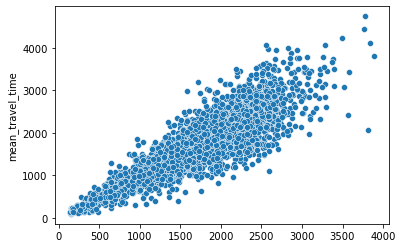

In [161]:
import seaborn as sns
sns.scatterplot(x=y_pred, y=y_test)

In [162]:

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
xgb = XGBRegressor(random_state=123)
xgb.fit(x_train, y_train)
result = xgb.predict(x_test)

mse = mean_squared_error(y_test, result)
mse

117278.48380204015

In [163]:
result_2.drop(['sourceid', 'dstid'], axis=1, inplace=True)

In [164]:
result_2

,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,geo_distance,pop_distance
0,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104,14114.137204,14141.759155
1,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430,13665.746851,12486.204868
2,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274,8249.044187,8333.425766
3,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626,2258.856791,2371.941188
4,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990,17972.040340,18017.793983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376,14838.312101,14758.276492
9826,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420,19944.834369,19834.023142
9827,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680,2206.109698,2155.409242
9828,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230,1860.069891,2020.300225


In [165]:
final_df = result_2[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area', 'mean_travel_time']]

In [166]:
# final_df

In [167]:
# final_df

In [168]:
# final_df.info()

In [169]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# # sc.fit_transform(final_df[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area']])
# final_df[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area']] = sc.fit_transform(final_df[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area']])


In [170]:
# final_df

In [171]:
# x = final_df[['dow', 'geo_distance', 'pop_distance','src_area', 'dst_area']]
# y = final_df['mean_travel_time']
#
#
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
#
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
# xgb = XGBRegressor(random_state=123)
# xgb.fit(x_train, y_train)
# result = xgb.predict(x_test)
#
# mse = mean_squared_error(y_test, result)
# mse

In [172]:
# from sklearn.linear_model import LinearRegression
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# result = lr.predict(x_test)
#
# mse = mean_squared_error(y_test, result)
# mse

In [173]:
df_test = pd.read_csv('testing_dataset.csv')
result_test=df_test.join(df_extract_geo_json, on='sourceid')
result_test = result_test.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area'})
result_test.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2=result_test.join(df_extract_geo_json, on='dstid')
result_test_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2 = result_test_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area'})

result_test_2['geo_distance'] = np.sqrt(((result_test_2['src_geoeast'] - result_test_2['dst_geoeast'])**2) + (result_test_2['src_geonorth'] - result_test_2['dst_geonorth'])**2)

result_test_2['pop_distance'] = np.sqrt(((result_test_2['src_popeast'] - result_test_2['dst_popeast'])**2) + (result_test_2['src_popnorth'] - result_test_2['dst_popnorth'])**2)

final_df_2 = result_test_2[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area']]
final_df_2


,dow,geo_distance,pop_distance,src_area,dst_area
0,2,9987.337683,10035.206276,0.790802,1.718660
1,2,3066.908052,2790.788419,0.790802,1.271040
2,2,6489.098088,6544.474463,1.159180,1.292050
3,7,7976.137536,7908.896510,1.159180,0.751309
4,2,9116.951080,8935.664777,3.296880,0.589744
...,...,...,...,...,...
1957,7,15794.944508,16293.460345,15.224400,1.483440
1958,1,17240.197592,17312.560325,1.720270,1.414060
1959,3,3169.857568,3238.068097,1.720270,2.897740
1960,5,7124.122753,7037.272199,2.388420,1.548530


In [174]:


df_keep = df_test[['sourceid','dstid', 'dow']]


y_pred = xgb.predict(final_df_2)
df_keep['mean_travel_time'] = y_pred
df_keep
df_keep.to_csv('submission2.csv',index=False)